#**Answer 1:**
Since the Hassian matrix for $q(x)$ can be written as:-
$$\nabla^2q(x)=\begin{bmatrix}
6144x_1^2-2048x_2+2 & -2048x_1\\
-2048x_1 & 1024
\end{bmatrix}$$

The diagonal matrix $\mathbf{D}^k$ that has the inverse of second partial derivatives $\Big(\frac{\partial^2f(x_k)}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal.


$\therefore \mathbf{D^k}$ can be written as:

$$ \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{ 6144x_1^2-2048x_2+2} & 0 \\ 0 & \frac{1}{1024}
\end{bmatrix}$$

In [ ]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[6144*(x[0]**2)-2048*x[1]+2,-2048*x[0]],[-2048*x[0],1024]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  k=max(np.linalg.eig(A)[0])/min(np.linalg.eig(A)[0])
  return k

In [ ]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  d_k = np.array([[1/evalh(x)[0][0], 0],[0, 1/evalh(x)[1][1]]])
  return d_k

In [ ]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (512*((x[1]-x[0]**2)**2)+ (4-x[0])**2)

In [ ]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([-2048*x[0]*(x[1]-x[0]**2)-2*(4-x[0]),1024*(x[1]-x[0]**2)])

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  #implement the backtracking line search
  p= -gradf
  while(evalf(x+alpha*p) > evalf(x) + gamma*alpha*np.dot(gradf.transpose(),p)):
    alpha = rho*alpha


  #print('final step length:',alpha)
  return alpha

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(x + alpha*direction) > ( evalf(x) +  (gamma*alpha*np.dot(gradf,direction)) ):
    alpha = rho*alpha
  return alpha

In [ ]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH_SCALING = 4

In [ ]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  #Complete the code   
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
    condition_num_arr = []
  k = 0
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_num_arr.append(find_condition_number(evalh(x)))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k, condition_num_arr

In [ ]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  d_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    direction = -np.matmul(d_k,g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,direction,alpha,rho,gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.matmul(np.multiply(step_length,g_x),d_k)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k

In [ ]:
my_start_x = np.array([8.,8.])
my_tol= 1e-5

In [ ]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x , iterations, condition1= find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
iterations1 = range(iterations)
print('Minimizer using exact line serach =',opt_x)
print('Function value =',evalf(opt_x))
print('Number of iterations required =',iterations)

Minimizer using exact line serach = [ 3.9999598  15.99967843]
Function value = 1.615724753450513e-09
Number of iterations required = 902336


In [ ]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x , iterations = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,rho,gamma)
print('Minimizer using exact line serach =',opt_x)
print('Function value =',evalf(opt_x))
print('Number of iterations required =',iterations)

Minimizer using exact line serach = [ 4.00000587 16.00004695]
Function value = 3.443537447531682e-11
Number of iterations required = 2918412


Here we can observe that the number of iterations taken by backtrack line search without scaling(902336) is very less as compared to that in case of backtrack line search with scaling(2918412). This is some unusual behaviour as generally, the reverse is the case.

But here the minimizer value is nearer to the true minimizer of the function i.e. (4,16) and the functional value is also closer to 0. 



#**Answer 3:**
Yes,we can identify and write down the matrix Q whose condition number needs to be analyzed in the
new gradient descent scheme with scaling with $\mathbf{D}^k = (\nabla^2q(\mathbf{x}))^{-1} $
and Q can be written as
$$\mathbf{Q} = \mathbf{(D^k)}^{\frac{1}{2}}H^k \mathbf{(D^k)}^{\frac{1}{2}}$$ where $H^k$ is Hassian matrix of a function for $k^{th}$ iteration

In [ ]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  if np.linalg.det(evalh(x)) == 0:
    raise ValueError('Determinant does not exist. Please check!!')
  return np.linalg.inv(evalh(x)) 

In [ ]:
#complete the code for gradient descent with scaling to find the minimizer
import scipy
from scipy.linalg import sqrtm
def find_minimizer_gdscaling_non_diagonal(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)

  condition_number_scaling = []

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    d_k = compute_D_k(x)
    direction = np.matmul(-d_k,g_x)
    
    p = scipy.linalg.sqrtm(d_k)
    hessn = np.matmul(np.matmul(p,evalh(x)),p)
    condition_number_scaling.append(find_condition_number(hessn))

    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x,direction, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength 
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(d_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  return x, k, condition_number_scaling

In [ ]:
my_start_x = np.array([8.0,8.0])
my_tol= 1e-5

In [ ]:
#Compute gradient descent with scaling and with backtracking line search 

print("Gradient descent algorithm Backtracking Line Search With scaling:")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, condition2 = find_minimizer_gdscaling_non_diagonal(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING, 1.0, 0.5, 0.5)
iterations2 = range(k)
print("Optimizer: ", x_opt_bls)
print('Minimum Value: ', evalf(x_opt_bls))
print("Number of iterations: ", k)


Gradient descent algorithm Backtracking Line Search With scaling:
Optimizer:  [ 4. 16.]
Minimum Value:  2.373469471365615e-25
Number of iterations:  48


#**Answer 4:**
**Backtracking Line Search Algorithm without scaling:**

Minimizer =  $[3.9999598, 15.99967843]$ \
Minimum Function Value f(x) = $1.615724753450513e-09$ \
Number of iterations = $902336$

**Backtracking Line Search using Newton's Method**

Minimzer = $ [ 4.00, 16.00]$ \
Minimum Function Value f(x) = $2.373469471365615e-25$ \
Number of iterations:  $48$ \


### **Observations:**
Here we can observe that the backtracking linear search using **Newton's** method converges to the optimizer way faster than line search without the Newton's method. 

The minimizer attained by Newton's method is exactly same as the actual minimum value of (4,16) and the functional value is also $10^{-16}$ times smaller than the value attained without Newton's method, that means very much better. 

Hence we can conclude that Newton's method is better than backtrack line search without scaling and without Newton's method.

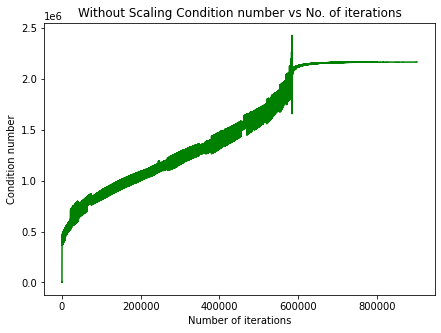

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(iterations1,condition1,label ='Without scaling', color ='green')
plt.xlabel('Number of iterations')
plt.ylabel('Condition number')
plt.title("Without Scaling Condition number vs No. of iterations")
plt.show()

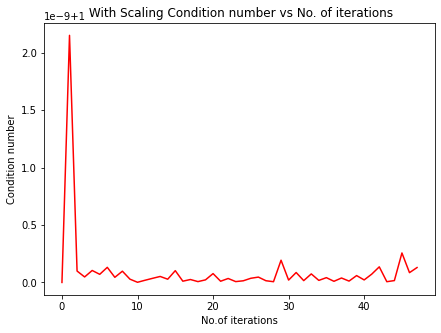

In [ ]:
plt.figure(figsize=(7,5))
plt.plot( iterations2,condition2,label = 'With scaling', color = 'red')
plt.xlabel('No.of iterations')
plt.ylabel('Condition number')
plt.title(" With Scaling Condition number vs No. of iterations")
plt.show()

### **Observations:**
**For without scaling**: We can observe that as the number of iterations increases, there is a general trend of increase in the condition number. The condition number increases following a zig zag pattern and finally it converges to the value of 2 around 600000 iterations.

**For Newton's Method:** Here the condition number increases to 2 in the first iteration and then it decreases to the value very close to 0 in the next iteration. After that the condition number remains in the range of 0-0.5 for the entire process. It also follows a zig zag pattern and here the convergence is very fast.